In [4]:
import numpy as np

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer
from qiskit.compiler import transpile
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import process_fidelity

from qiskit.extensions import RXGate, XGate, CXGate

In [7]:
#Operator create
XX = Operator([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])
XX

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [8]:
# Operater propaty

XX.data

array([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [10]:
input_dim, output_dim = XX.dim
input_dim, output_dim

(4, 4)

In [11]:
#InputとOutputの関数でサブシステムの追跡可能

op = Operator(np.random.rand(2 ** 1, 2 ** 2))
print('Input dimensions:', op.input_dims())
print('Output dimesions:', op.output_dims())


Input dimensions: (2, 2)
Output dimesions: (2,)


In [12]:
#6*6の行列場合
op = Operator(np.random.rand(6, 6))
print('Input dimensions:', op.input_dims())
print('Output dimensions:', op.output_dims())


Input dimensions: (6,)
Output dimensions: (6,)


In [18]:
#初期化時に手動でして可能
op = Operator(np.random.rand(2 ** 1, 2 ** 3), input_dims=[8])
print('Input dimensions:', op.input_dims())
print('Output dimensions:', op.output_dims())

Input dimensions: (8,)
Output dimensions: (2,)


In [20]:
# Specify system is a qubit and qutrit
op = Operator(np.random.rand(6, 6),
              input_dims=[2, 3], output_dims=[2, 3])
print('Input dimensions:', op.input_dims())
print('Output dimensions:', op.output_dims())

Input dimensions: (2, 3)
Output dimensions: (2, 3)


In [21]:
print('Dimension of input system 0:', op.input_dims([0]))
print('Dimension of iutput system 1:', op.input_dims([1]))

Dimension of input system 0: (2,)
Dimension of iutput system 1: (3,)


In [22]:
#Pauliオブジェクトからオペレーターに変換

pauliXX = Pauli('XX')
Operator(pauliXX)


Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [23]:
#Gateオブジェクトからオペレータに変換
Operator(CXGate())

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [24]:
#parameterized gateオブジェクトからオペレータに変換
Operator(RXGate(np.pi / 2))

Operator([[0.70710678+0.j        , 0.        -0.70710678j],
          [0.        -0.70710678j, 0.70710678+0.j        ]],
         input_dims=(2,), output_dims=(2,))

In [25]:
#QuantumCircuitオブジェクトからオペレータに変換
circ = QuantumCircuit(10)
circ.h(0)
for j in range(1, 10):
    circ.cx(j-1, j)

Operator(circ)

Operator([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          ...,
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j]],
         input_dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2), output_dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2))

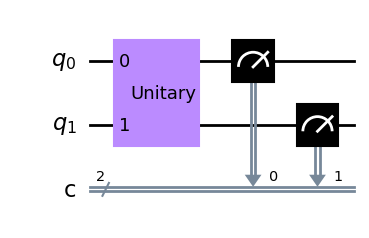

In [26]:
#回路にオペレータ利用
XX = Operator(Pauli('XX'))

circ = QuantumCircuit(2,2)
circ.append(XX, [0,1])
circ.measure([0,1],[0,1])
circ.draw('mpl')

In [30]:
backend = BasicAer.get_backend('qasm_simulator')
circ =transpile(circ, backend, basis_gates=['u1', 'u2', 'u3', 'cx'])
job =backend.run(circ)
job.result().get_counts(0)

{'11': 1024}

In [36]:
circ2 = QuantumCircuit(2,2)
circ2.append(Pauli('YY'),[0, 1])
circ2.measure([0,1], [0,1])

circ2.draw()

┌────────────┐┌─┐   
q_0: ┤0           ├┤M├───
     │  Pauli(YY) │└╥┘┌─┐
q_1: ┤1           ├─╫─┤M├
     └────────────┘ ║ └╥┘
c: 2/═══════════════╩══╩═
                    0  1

In [40]:
#単一量子ビットオペレータの場合
A = Operator(Pauli('X'))
B = Operator(Pauli('Z'))
A.tensor(B)

Operator([[ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
          [ 0.+0.j, -0.+0.j,  0.+0.j, -1.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j, -0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [42]:
#順序が逆になるテンソル積
A = Operator(Pauli('X'))
B = Operator(Pauli('Z'))

A.expand(B)

Operator([[ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j, -0.+0.j, -1.+0.j],
          [ 0.+0.j,  0.+0.j, -1.+0.j, -0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [43]:
A = Operator(Pauli('X'))
B = Operator(Pauli('Z'))
A.compose(B)

Operator([[ 0.+0.j,  1.+0.j],
          [-1.+0.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))

In [49]:
#順番を逆にする役割
A = Operator(Pauli('X'))
B = Operator(Pauli('Z'))

A.compose(B, front= True)

Operator([[ 0.+0.j, -1.+0.j],
          [ 1.+0.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))

In [50]:
#Compose XZと3-qubit indetity
op = Operator(np.eye(2 ** 3))
XZ = Operator(Pauli('XZ'))
op.compose(XZ, qargs=[0,2])

Operator([[ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
           -1.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))

In [61]:
op.is_unitary()

False

In [53]:
#Compose YXと前のオペレータ
op = Operator(np.eye(2 ** 4))
YX = Operator(Pauli('YX'))
op.compose(XZ, qargs= [0,2], front=True)

Operator([[ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,
            0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,
            0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
           -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j,  0.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j,  0.+0.j,  0.+0.j

In [60]:
op.is_unitary()

False

In [58]:
#標準な線形オペレータ(非ユニタリー性）
XX = Operator(Pauli('XX'))
YY = Operator(Pauli('YY'))
ZZ = Operator(Pauli('ZZ'))

op = 0.5 * (XX + YY -6 * ZZ)
op

Operator([[-3.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  3.+0.j,  1.+0.j,  0.+0.j],
          [ 0.+0.j,  1.+0.j,  3.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, -3.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [59]:
op.is_unitary()

False

In [62]:
Operator(np.eye(2)).compose([[0,1],[1,0]])

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

In [65]:
#Operatorの近似的チェック法

Operator(Pauli('X'))!= Operator(XGate())

False

In [67]:
Operator(XGate()) != np.exp(1j * 0.5) * Operator(XGate())

True

In [70]:
op_a = Operator(XGate())
op_b = np.exp(1j * 1) * Operator(XGate())

F = process_fidelity(op_a, op_b)
print('Process fidelity =', F)

Process fidelity = 1.0


In [72]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright